# ML101 Week 1 Assignment Model Solution
**Note**: This is just a model solution. Same tasks can be done in multiple different ways. The main aim should be following a correct approach.

## Introduction
A bank has multiple roles. Providing a loan to an individual is one of the major tasks a bank has to go through. Banks take loan approval decisions based on the applicant's profile. There are two types of risk associated with the bank’s decision.
- Not approving a loan to an applicant having a good credit risk is a loss of business to the bank.
- Approving a loan to an applicant having a bad  credit risk is also a loss of business to the bank.
<br>
<br>
Hence, banks have to be very careful while accepting or rejecting a loan application



## Objective of the study:
The main objective of this assignment is to minimize the risk and maximize the profit of the bank. Bank has to make a decision based on the applicant’s profile to minimize the loss from the bank's perspective. Bank considers the applicant's demographic and socio-economic status to take any decision to approve or reject a loan application. The German Credit data in the current assignment contains many features and a classification approach to identify the credit worthiness of an applicant.       
      



In this assignment we are utilizing the exploratory data analysis (EDA) as a data exploration technique to acquire knowledge, discover new relations, apply new methodologies and unravel patterns in data. It is important to apply the necessary rationale behind each step to address the main objective of the study.

### Dataset Description:

The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. Columns of the dataset and their meaning are as follows;



| Variables | Value |
| --- | --- |
| Age | numeric|
|Sex|text: male, female|
|Job|numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled|
|Housing|text: own, rent, or free|
|Saving accounts|text - little, moderate, quite rich, rich|
|Checking account|text - little, moderate, rich|
|Credit amount|numeric, in Deutsche Mark|
|Duration|numeric, in month|
|Purpose|text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others|

## Method
Before getting into any sophisticated analysis, the first step is to do an EDA and data cleaning. Since both categorical and continuous variables are included in the data set.
- Note: As this project includes basic data cleaning and EDA. Nearly all possible steps are added. However, in real life we perform nearly all steps but report only **important infomration** aiming towards the project.


### Q1: Perform basic exploration of data.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# To load the data (.csv file)
data = pd.read_csv("German_Credit.csv")

### Step1: Understanding the data

In [ ]:
data.head()   # To see first 5 rows from the top

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


From the **head** command it is clear that there are missing values in the dataset, as there are NaN in checking account.

In [ ]:
data.tail()   # To see last 5 rows

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


From the **tail** command it is clear that there are missing values in the dataset, as there is are NaN in checking account.

In [ ]:
data.shape   # To see no.of rows and columns of our dataset

(1000, 10)

There are total 1000 observations and 10 variables in the data set.

In [ ]:
data.info()    # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


We have 5 numerical and 5 categorical features based on info functions. However, it seems that first unnamed variable is unnecessary and just representing serial numbers. Similary job is a categroical value but coded as numbers. Hence, we have to treat it as category. Saving and checking accounts have many missing values.     

In [ ]:
# converting job into category
data['Job'] = data.Job.astype('category')

#### Summary of continuous variable

In [ ]:
 data.describe()    # To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,Unnamed: 0,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,3271.258000,20.903000
std,288.819436,11.375469,2822.736876,12.058814
min,0.000000,19.000000,250.000000,4.000000
25%,249.750000,27.000000,1365.500000,12.000000
50%,499.500000,33.000000,2319.500000,18.000000
75%,749.250000,42.000000,3972.250000,24.000000
max,999.000000,75.000000,18424.000000,72.000000


In [ ]:
data.columns   # To return the column labels of the Dataset.

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

#### Checking unique values
- We want to be sure that there is no unnecesrry value present in our dataset

In [ ]:
# Let's check for the unique values in our data

data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

In [ ]:
# checking for the unique values in gender(Sex) column

data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
#To check unique values in Job column

data['Job'].unique()

[2, 1, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

In [ ]:
#To check unique values in Age

data.Age.unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [ ]:
#To check unique values in Housing column

data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
#To check unique values in Saving accounts

data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
#To check unique values in Checking account

data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
#To check unique values in purpose

data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

From the above steps it is clear that our data do not contain any unnecessary values or missing values in any other format.

###  Q3:Conduct the following steps only as necessary along with the reason behind doing it with suitable steps;
Missing values
Erroneous/wrong values
Appropriate binning techniques
Appropriate encoding techniques
)

### Step2: Data Cleaning

As the first column is ambiguous and not useful further, let's drop the column.

In [ ]:
data.drop("Unnamed: 0", inplace=True, axis=1)   # To remove specified column / row
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


We can see that the first column is deleted.
Now we need to encode Job column values.

In [ ]:
# To describe numeric and categorical columns
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.0,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,4.0,3,4,3,NaN,NaN,8
top,NaN,male,2.0,own,little,little,NaN,NaN,car
freq,NaN,690,630.0,713,603,274,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


### Summary:
    
* From the above description, we can see:
    1. The count of each column
    2. The missed values
    3. The average age of people in our dataset is 35.54. Their age is varying from 19 to 75.
    4. The average credit amount borrowed is 3271

In [ ]:
data = data.rename(columns={"Credit amount": "Credit_amount"})   # To rename a column name. Same thing can be done for other columns too.

In [ ]:
# Checking for the null values field wise

data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In the dataset, we have missing or erroneous values in Saving Accounts=183 Checking Account=394. Columns Saving accounts and Checking account have significant amount of missing data. This may be due to the fact that many people didn't have an account when applying to take credit.

<AxesSubplot:>

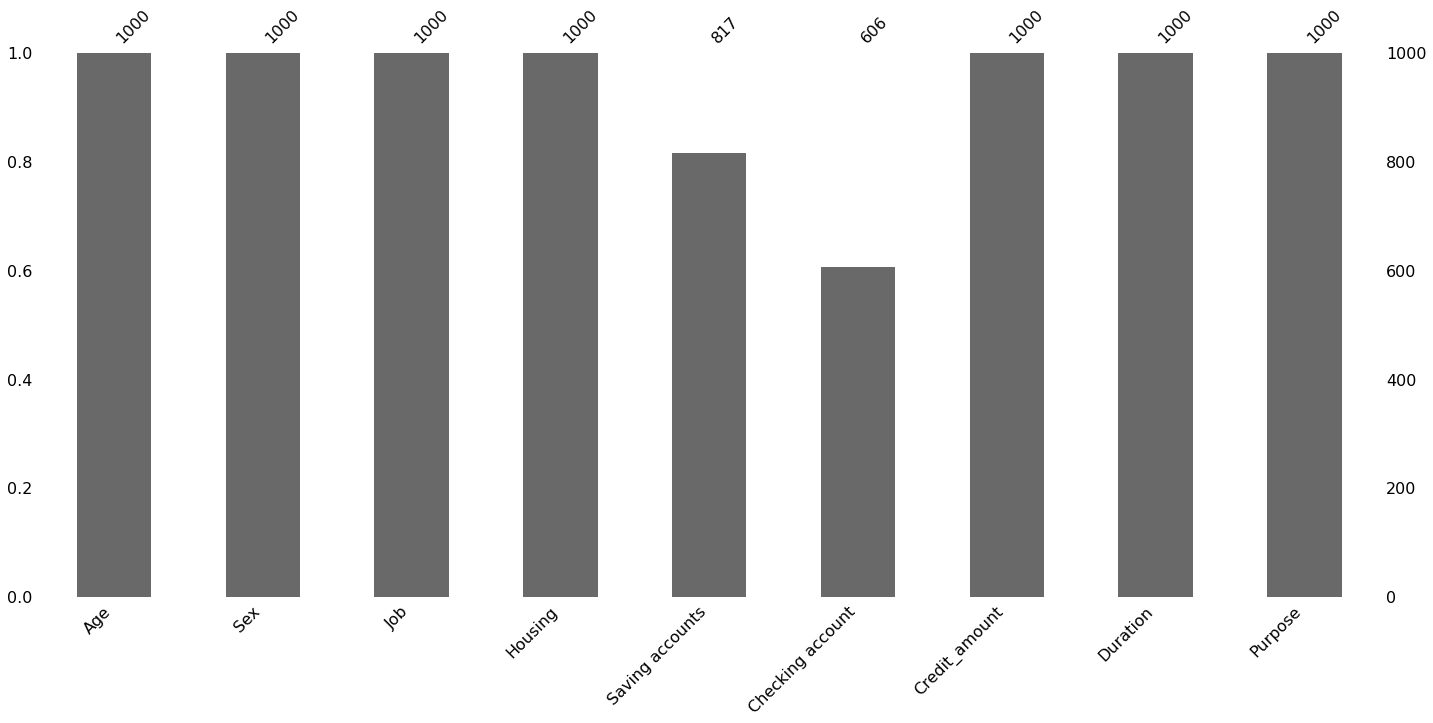

In [ ]:
# msno.bar is a simple visualization of null values by column:

msno.bar(data.sample(1000))

<AxesSubplot:>

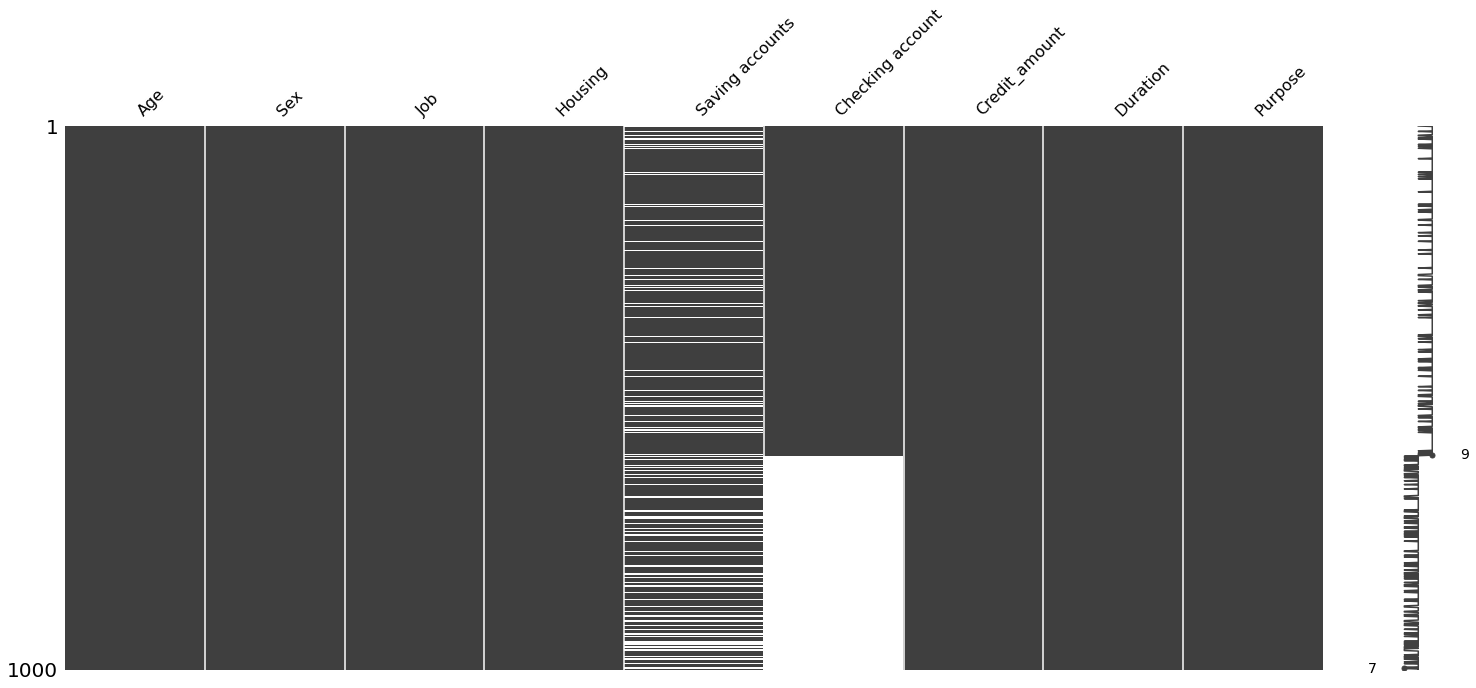

In [ ]:
sorted = data.sort_values('Checking account')
msno.matrix(sorted)

<AxesSubplot:>

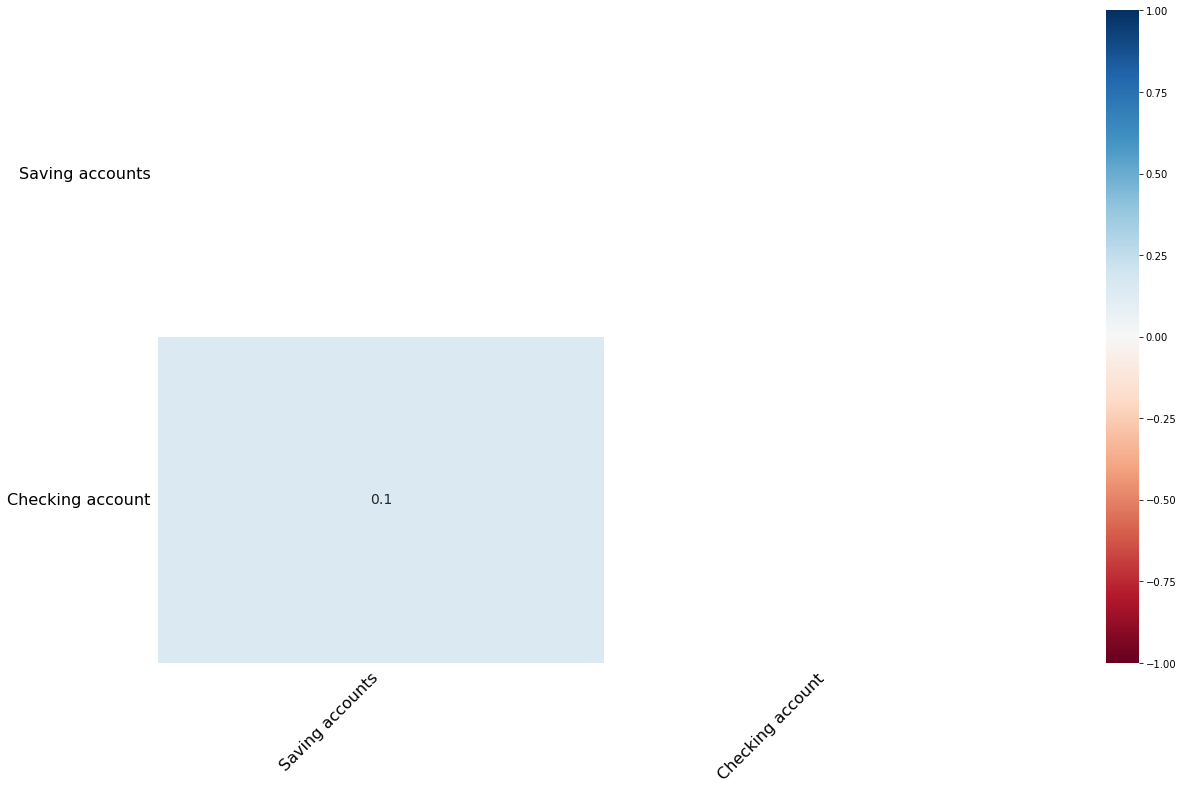

In [ ]:
# To check the missing no. correlation heatmap measures nullity correlation.

msno.heatmap(data)

The correlation heatmap will only include columns with missing values in the plot. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.The above heatmap show no linear corelationship between spotted variables.It has Missing Completely At Random, MCAR pattern of missing values.

#### Creating dummy varaibles to perform advance imputation techniques
- There are so many missing values in two columns hence mean or median will not be a good approach.
- We are just using KNN imuptation to fill the missing values


**Note** : You must have to perform other approaches too and explore more techniques as possible and justify the approach.

In [ ]:
## Converting males to 0 and females to 1
data['Sex'] = data.Sex.map({'male': 0, 'female':1})

data['Housing'] = data.Housing.map({'own': 0, 'rent':1, 'free':2})

data['Saving accounts'] = data['Saving accounts'].map({'little': 0, 'moderate':1,
                                                   'rich':2, 'quite rich':3})

data['Checking account'] = data['Checking account'].map({'little': 0, 'moderate':1,
                                                   'rich':2})

In [ ]:
# Splitting outcome and features to avoid data leakage
Purpose = data.Purpose
Features = data.drop('Purpose', axis = 1)

In [ ]:
Features.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration
0,67,0,2,0,NaN,0.0,1169,6
1,22,1,2,0,0.0,1.0,5951,48
2,49,0,1,0,0.0,NaN,2096,12
3,45,0,2,2,0.0,0.0,7882,42
4,53,0,2,2,0.0,0.0,4870,24
5,35,0,1,2,NaN,NaN,9055,36
6,53,0,2,0,3.0,NaN,2835,24
7,35,0,3,1,0.0,1.0,6948,36
8,61,0,1,0,2.0,NaN,3059,12
9,28,0,3,0,0.0,1.0,5234,30


In [ ]:
Features.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
from fancyimpute import KNN
knn_imputer = KNN()
Features_knn = Features.copy(deep=True)
Features_knn.iloc[:, :] = knn_imputer.fit_transform(Features_knn)

Imputing row 1/1000 with 1 missing, elapsed time: 0.153
Imputing row 101/1000 with 1 missing, elapsed time: 0.153
Imputing row 201/1000 with 1 missing, elapsed time: 0.153
Imputing row 301/1000 with 1 missing, elapsed time: 0.153
Imputing row 401/1000 with 1 missing, elapsed time: 0.153
Imputing row 501/1000 with 0 missing, elapsed time: 0.153
Imputing row 601/1000 with 0 missing, elapsed time: 0.153
Imputing row 701/1000 with 1 missing, elapsed time: 0.153
Imputing row 801/1000 with 1 missing, elapsed time: 0.168
Imputing row 901/1000 with 0 missing, elapsed time: 0.168


**Note**
- Here we just used KNN imputation techniques to fill the missing value
- In real life we have to use multiple techniques and justify which one is better.

In [ ]:
Features.head()
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   int64   
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   int64   
 4   Saving accounts   817 non-null    float64 
 5   Checking account  606 non-null    float64 
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
dtypes: category(1), float64(2), int64(5)
memory usage: 56.0 KB


In [ ]:
Features_knn.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration
0,67.0,0.0,2.0,0.0,0.432752,0.000000,1169.0,6.0
1,22.0,1.0,2.0,0.0,0.000000,1.000000,5951.0,48.0
2,49.0,0.0,1.0,0.0,0.000000,1.509638,2096.0,12.0
3,45.0,0.0,2.0,2.0,0.000000,0.000000,7882.0,42.0
4,53.0,0.0,2.0,2.0,0.000000,0.000000,4870.0,24.0
5,35.0,0.0,1.0,2.0,0.911156,0.925932,9055.0,36.0
6,53.0,0.0,2.0,0.0,3.000000,0.964432,2835.0,24.0
7,35.0,0.0,3.0,1.0,0.000000,1.000000,6948.0,36.0
8,61.0,0.0,1.0,0.0,2.000000,1.458235,3059.0,12.0
9,28.0,0.0,3.0,0.0,0.000000,1.000000,5234.0,30.0


In [ ]:
Features_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   float64
 2   Job               1000 non-null   float64
 3   Housing           1000 non-null   float64
 4   Saving accounts   1000 non-null   float64
 5   Checking account  1000 non-null   float64
 6   Credit_amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [ ]:
German_data = pd.concat([Features_knn, Purpose], axis = 1)
German_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose
0,67.0,0.0,2.0,0.0,0.432752,0.000000,1169.0,6.0,radio/TV
1,22.0,1.0,2.0,0.0,0.000000,1.000000,5951.0,48.0,radio/TV
2,49.0,0.0,1.0,0.0,0.000000,1.509638,2096.0,12.0,education
3,45.0,0.0,2.0,2.0,0.000000,0.000000,7882.0,42.0,furniture/equipment
4,53.0,0.0,2.0,2.0,0.000000,0.000000,4870.0,24.0,car


#### Converting numbers into categories

In [ ]:
## Converting males to 0 and females to 1
German_data['Sex'] = data.Sex.map({0:'male', 1:'female'})
German_data['Job'] = German_data.Job.map({0:'UnSK_NR', 1:'UnSK_R', 2:'Skilled', 3:'Highly Skilled'})
German_data['Housing'] = German_data.Housing.map({0:'own', 1:'rent', 2:'free'})
German_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose
0,67.0,male,Skilled,own,0.432752,0.000000,1169.0,6.0,radio/TV
1,22.0,female,Skilled,own,0.000000,1.000000,5951.0,48.0,radio/TV
2,49.0,male,UnSK_R,own,0.000000,1.509638,2096.0,12.0,education
3,45.0,male,Skilled,free,0.000000,0.000000,7882.0,42.0,furniture/equipment
4,53.0,male,Skilled,free,0.000000,0.000000,4870.0,24.0,car


In [ ]:
### As there are probability values hence we have to use a different approach
# data['Saving accounts'] = data['Saving accounts'].map({'little': 0, 'moderate':1,'rich':2, 'quite rich':3})

def SavAcc(x):
    if x < 0.5:
        return 'little'
    elif x < 1.5:
        return 'moderate'
    elif x < 2.5:
        return 'rich'
    else:
        return 'Quite rich'


German_data['Sav_cat'] = German_data['Saving accounts'].apply(SavAcc)
German_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Sav_cat
0,67.0,male,Skilled,own,0.432752,0.000000,1169.0,6.0,radio/TV,little
1,22.0,female,Skilled,own,0.000000,1.000000,5951.0,48.0,radio/TV,little
2,49.0,male,UnSK_R,own,0.000000,1.509638,2096.0,12.0,education,little
3,45.0,male,Skilled,free,0.000000,0.000000,7882.0,42.0,furniture/equipment,little
4,53.0,male,Skilled,free,0.000000,0.000000,4870.0,24.0,car,little


In [ ]:
### As there are probability values hence we have to use a different approach

# data['Checking account'] = data['Checking account'].map({'little': 0, 'moderate':1, 'rich':2})

def ChecAcc(x):
    if x < 0.5:
        return 'little'
    elif x < 1.5:
        return 'moderate'
    else:
        return 'rich'


German_data['Check_cat'] = German_data['Checking account'].apply(ChecAcc)
German_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Sav_cat,Check_cat
0,67.0,male,Skilled,own,0.432752,0.000000,1169.0,6.0,radio/TV,little,little
1,22.0,female,Skilled,own,0.000000,1.000000,5951.0,48.0,radio/TV,little,moderate
2,49.0,male,UnSK_R,own,0.000000,1.509638,2096.0,12.0,education,little,rich
3,45.0,male,Skilled,free,0.000000,0.000000,7882.0,42.0,furniture/equipment,little,little
4,53.0,male,Skilled,free,0.000000,0.000000,4870.0,24.0,car,little,little


In [ ]:
German_data = German_data.drop(['Saving accounts', 'Checking account'], axis = 1)
German_data.head()

,Age,Sex,Job,Housing,Credit_amount,Duration,Purpose,Sav_cat,Check_cat
0,67.0,male,Skilled,own,1169.0,6.0,radio/TV,little,little
1,22.0,female,Skilled,own,5951.0,48.0,radio/TV,little,moderate
2,49.0,male,UnSK_R,own,2096.0,12.0,education,little,rich
3,45.0,male,Skilled,free,7882.0,42.0,furniture/equipment,little,little
4,53.0,male,Skilled,free,4870.0,24.0,car,little,little


## Data Exploration



### Q2: Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis.)

### Distribution of continuous variable

In [ ]:
# age
fig = px.histogram(German_data, x="Age", nbins=15,  height = 500, width = 500)
fig.show()


In [ ]:
fig = px.box(German_data, y="Age", height = 500, width = 500)
fig.show()

* Maximum number of applicants were between the ages of 25-30
* And the data is right skewed

In [ ]:
fig = px.histogram(German_data, x="Credit_amount", nbins=25, height = 500, width = 500)
fig.show()

In [ ]:
fig = px.box(German_data, y="Credit_amount", height = 500, width = 500)
fig.show()

* The credit amount is exponentially decreasing.
* And data is right skewed

In [ ]:
fig = px.histogram(German_data, x="Duration", nbins=8, height = 500, width = 500)
fig.show()

In [ ]:
fig = px.box(German_data, y="Duration", height = 500, width = 500)
fig.show()

* Maximum number of credits were for a duration of 1-2 years.
* At the glance of the distribution of the continuous variables shows that the variables are right skewed.

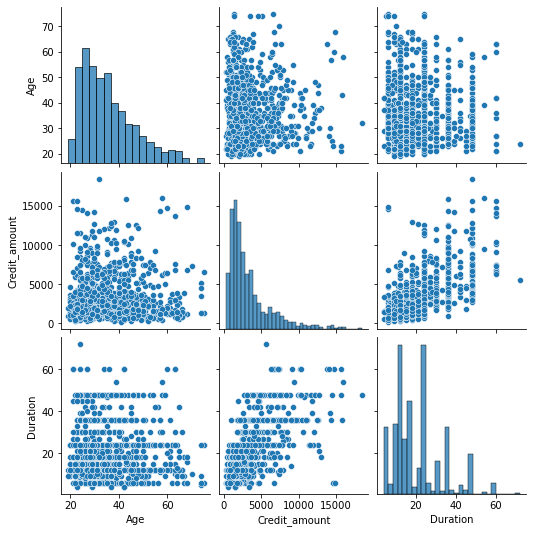

In [ ]:
sns.pairplot(German_data)

As there is no linear relation between variables, let's go with spearman correlation matrix, which gives wider X perspective on what exactly are we dealing with here and a correlation matrix is a table showing correlation coefficients between variables and is used to summarize data as an input into a more advanced analysis and also a diagnostic for advanced analysis.

In [ ]:
corr = German_data.corr(method = "spearman")
#sns.heatmap(corr, annot = True)
#plt.show())
corr

,Age,Credit_amount,Duration
Age,1.000000,0.026298,-0.036316
Credit_amount,0.026298,1.000000,0.624709
Duration,-0.036316,0.624709,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

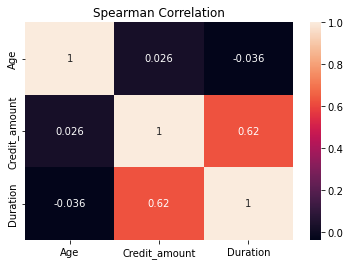

In [ ]:
#cmap = sns.diverging_palette(250, 0, as_cmap=True)
#sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, vmax=1, vmin=-.2)

sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot = True)
plt.title("Spearman Correlation")

* It can be observed that duration and Credit amount are positively correlated, however moderately, and there is no correlation with for both variables.

### Categorical

#### To See unique values:

In [ ]:
pd.value_counts(German_data['Job'])    # To get the count of unique values.

Skilled           630
UnSK_R            200
Highly Skilled    148
UnSK_NR            22
Name: Job, dtype: int64

In [ ]:
pd.value_counts(German_data['Sex'])

male      690
female    310
Name: Sex, dtype: int64

In [ ]:
pd.value_counts(German_data['Housing'])

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [ ]:
pd.value_counts(German_data['Sav_cat'])

little        721
moderate      160
Quite rich     63
rich           56
Name: Sav_cat, dtype: int64

In [ ]:
pd.value_counts(German_data['Check_cat'])

moderate    505
little      421
rich         74
Name: Check_cat, dtype: int64

We can visually see these using plots

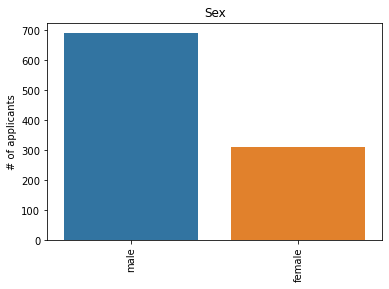

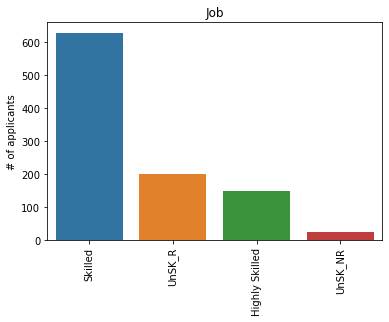

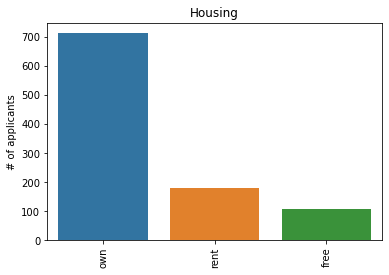

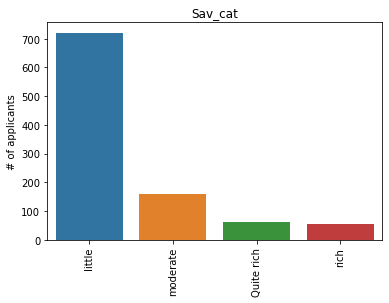

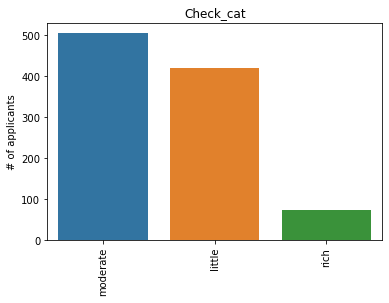

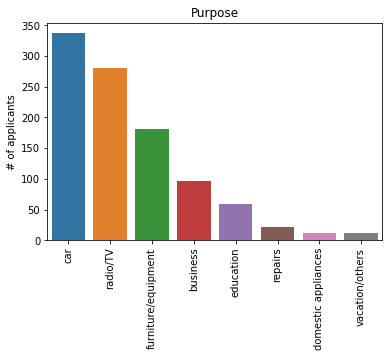

In [ ]:
df_cat = German_data[['Sex', 'Job', 'Housing', 'Sav_cat', 'Check_cat','Purpose']]   # Creating a dataframe containing categorical features
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "# of applicants"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    chart.y ="# of applicants"
    plt.title(title)
    plt.show()

#### From the above graphs we can say:

* More no.of gents(Male) applied for credit compared to female candidates.
* More no.of Skilled Workers applied for credit.
* People who owned houses applied more for credit.
* Poor people applied for more credit.
* Maximum applications were for cars, TV and furniture.

### Analysis by Group

### Gender Analysis:

### Objectives:
Find the distribution of genders in our dataset.
See the distribution o each gender by the age (For instance, we have a higher number of young males than younger females)
What were the main application reasons for a credit loan? Does it vary by Gender?
How many jobs does each gender have? How many are Unemployed?

<AxesSubplot:xlabel='Sex', ylabel='Credit_amount'>

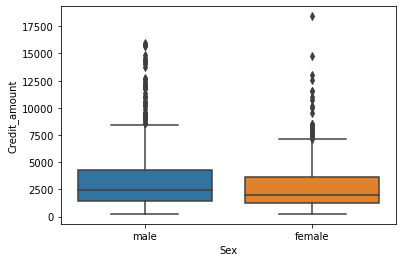

In [ ]:
# A plot to see Gender vs credit amount

sns.boxplot(x ='Sex', y ='Credit_amount', data = German_data)


C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



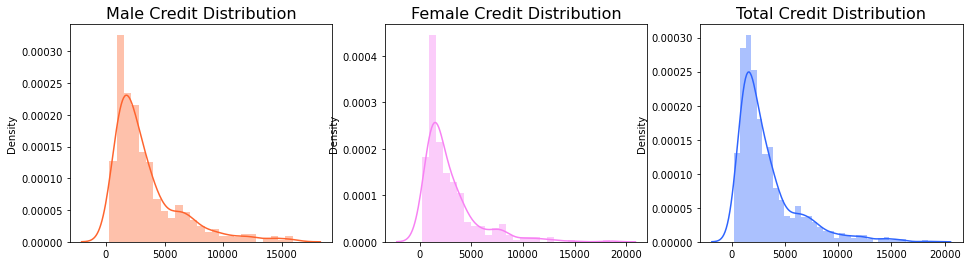

In [ ]:
# Distribution of Credit_Amount for each Gender

male_credit = German_data["Credit_amount"].loc[German_data["Sex"] == "male"].values
female_credit = German_data["Credit_amount"].loc[German_data["Sex"] == "female"].values
total_credit = German_data['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

In [ ]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.

German_data["Purpose"].unique()
sex_purpose = pd.crosstab(German_data['Purpose'], German_data['Sex']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


<AxesSubplot:xlabel='Purpose'>

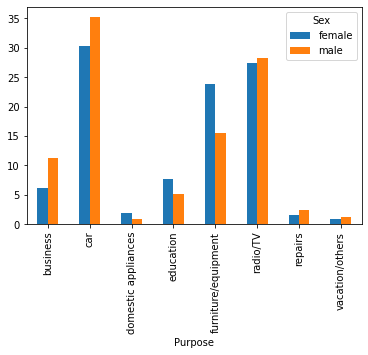

In [ ]:
# A plot to see the application reasons for a loan by gender

sex_purpose.plot(kind='bar')


* Men took loans for car and radio/TV and female took more loans for furniture/equipment and education.

<AxesSubplot:xlabel='Credit_amount', ylabel='Purpose'>

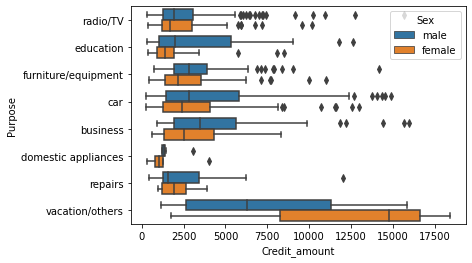

In [ ]:
# Credit distribution by purpose
sns.boxplot(y ='Purpose', x ='Credit_amount', data = German_data, hue ='Sex')

* Women took large amounts of credit for vacation than Men

* Note: We can also facet this graph to make it more clear.

<AxesSubplot:xlabel='Job', ylabel='Credit_amount'>

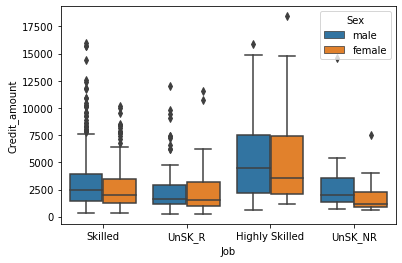

In [ ]:
# A plot to see the credit amount distribution genderwise wrt their jobs

sns.boxplot(x ='Job', y ='Credit_amount', data = German_data, hue ='Sex')

* As we can see from the above graph, highly skilled men and women took large amounts of credit

<AxesSubplot:xlabel='Age', ylabel='Purpose'>

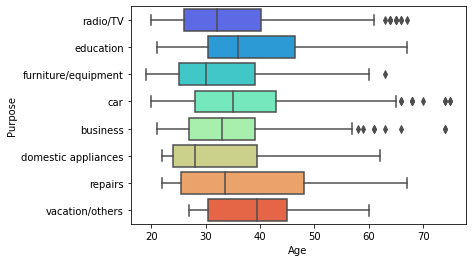

In [ ]:
# A plot to see Age vs purpose

#data.groupby("Sex").mean()[["Purpose"]].T.plot(kind="box")

sns.boxplot(y='Purpose',x='Age',data=German_data,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Purpose'>

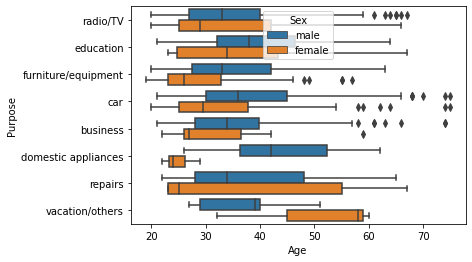

In [ ]:
# A plot to see Age vs purpose gender wise
sns.boxplot(y ='Purpose', x ='Age', data = German_data, hue ='Sex')

<AxesSubplot:xlabel='Credit_amount', ylabel='Purpose'>

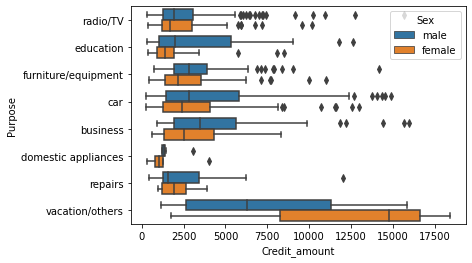

In [ ]:
# A plot to see Credit_amount vs purpose gender wise

sns.boxplot(y ='Purpose', x ='Credit_amount', data = German_data, hue ='Sex')

<AxesSubplot:xlabel='Credit_amount', ylabel='Purpose'>

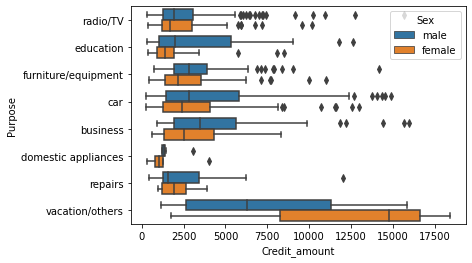

In [ ]:
# A plot to see Credit_amount vs purpose gender wise

sns.boxplot(y ='Purpose', x ='Credit_amount', data = German_data, hue ='Sex')

In [ ]:
# Percent distribution of Gender (how many jobs does each gender have in %)

number_of_jobs = pd.crosstab(German_data["Job"], German_data["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
Highly Skilled,11.935484,16.086957
Skilled,63.548387,62.753623
UnSK_NR,3.870968,1.449275
UnSK_R,20.645161,19.710145


In [ ]:
#job_number_m = number_of_jobs["male"].values.tolist()
#job_number_male = ["%.2f" % element for element in job_number_m]
#job_number_male

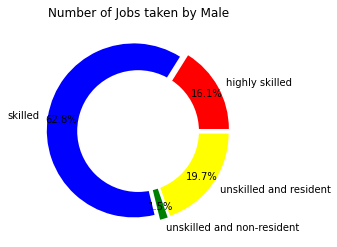

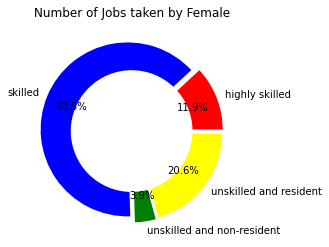

In [ ]:
# No. of jobs taken by gender

# Values to list
job_number_m = number_of_jobs["male"].values.tolist()
job_number_f = number_of_jobs["female"].values.tolist()

# Round elements
job_number_male = ["%.2f" % element for element in job_number_m]
job_number_female = ["%.2f" % element for element in job_number_f]

# define Seaborn color palette to use
#palette_color = sns.color_palette('bright')

# plotting data on chart
#plt.pie(job_number_male, labels='Jobs', colors=palette_color, autopct='%.0f%%')
#plt.show()

#plt.pie(job_number_female, labels='Jobs', colors=palette_color, autopct='%.0f%%', type= 'donut')

labels = 'highly skilled','skilled', 'unskilled and non-resident', 'unskilled and resident'

# colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F']
colors = ['Red','Blue','Green','Yellow']

# explosion
explode = (0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(job_number_male, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()


# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Number of Jobs taken by Male')

# Add Legends
#plt.legend(labels, loc="upper right")

# displaying chart
plt.show()

plt.pie(job_number_female, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.70,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


# Adding Title of chart
plt.title('Number of Jobs taken by Female')

# Add Legends
#plt.legend(labels, loc="upper right")


# displaying chart
plt.show()




### Summary:
* There is 2x more males than females in our dataset.
* Most females that applied for a credit loan were less than 30 .
* Most of the males that applied for a loan ranged from their 20s-40s
* Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)
* Males applied 2x more than females for a credit loan to invest in a business.
* 2x of females were unemployed compared to males.
* 2x of males worked 3 jobs compared to females.
* Suprisingly, most people that applied for a credit loan have two jobs!
* We can see that highly skilled workers took greater credit amount than others even though they applied for less no. of applications.

### Age groups:

In this section we will create categorical groups based on the age column. The following categorical variables will belong to the "Age_Group" column:

-> Young Adult: Clients age ranges from (19 - 25).

-> Adults: Clients age ranges from (25-45)

-> Senior: Clients age ranges from (46-60)

-> Elder: Clients age is more than 60 years old

### What we want to accomplish:

Create different age groups based on their age.

See the Credit amounts borrowed by clients belonging to each age group.

Get deeper in our analysis and determine which loans were high risk and see if there is any patterns with regards to age groups.

In [ ]:
German_data['Age_Group'] = np.nan

lst = [German_data]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 25), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 25) & (col['Age'] <= 45), 'Age_Group'] = 'Adults'
    col.loc[(col['Age'] > 45) & (col['Age'] <= 60), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 60, 'Age_Group'] = 'Elder'

German_data.head()


,Age,Sex,Job,Housing,Credit_amount,Duration,Purpose,Sav_cat,Check_cat,Age_Group
0,67.0,male,Skilled,own,1169.0,6.0,radio/TV,little,little,Elder
1,22.0,female,Skilled,own,5951.0,48.0,radio/TV,little,moderate,Young Adults
2,49.0,male,UnSK_R,own,2096.0,12.0,education,little,rich,Senior
3,45.0,male,Skilled,free,7882.0,42.0,furniture/equipment,little,little,Adults
4,53.0,male,Skilled,free,4870.0,24.0,car,little,little,Senior


<AxesSubplot:xlabel='Age_Group', ylabel='Credit_amount'>

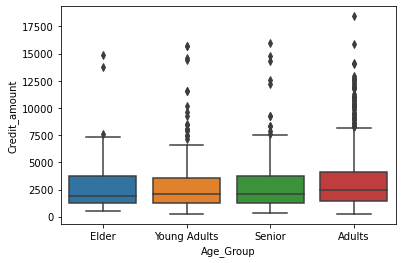

In [ ]:
sns.boxplot(x ='Age_Group', y ='Credit_amount', data = German_data)

### Summary:

From the above and few more graphs from gender analysis we can say that,

* The younger age group tended to ask slightly for higher loans compared to the older age groups.

* Interesting enough these are the groups that are most likely to be unemployed or working part-time, since the youngest group
  either don't have the experience to have a job or they are studying in a university so they don't have enough time to work in   a full-time job.

* In the elderly group side, this is the group that are most likely receiving their money from their pensions, meaning the elderly group is most likely unemployed or working part-time.


<AxesSubplot:xlabel='Job', ylabel='Credit_amount'>

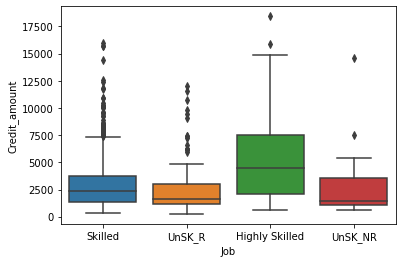

In [ ]:
# A plot of Job vs Credit amount

sns.boxplot(data=German_data, x="Job", y="Credit_amount")

<AxesSubplot:xlabel='Housing', ylabel='Credit_amount'>

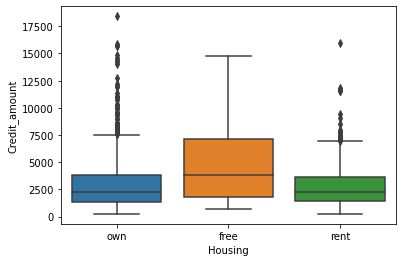

In [ ]:
sns.boxplot(data=German_data, x="Housing", y="Credit_amount")

<AxesSubplot:xlabel='Age_Group', ylabel='Credit_amount'>

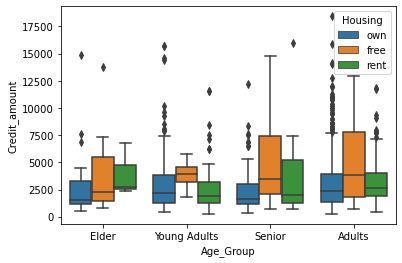

In [ ]:
# A plot to see Credit amount wrt to their age group

# data.groupby("Housing").mean()[["Age", "Duration"]].T.plot(kind="box")

sns.boxplot(data=German_data, x="Age_Group", y="Credit_amount", hue="Housing")

* People who live in free housing were of higher age.

<AxesSubplot:xlabel='Sav_cat', ylabel='Credit_amount'>

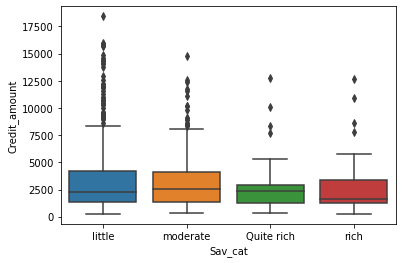

In [ ]:
# A plot to see Saving accounts vs Credit amount

# data.groupby("Saving accounts").mean()["Credit_amount"].T.plot(kind="bar")

sns.boxplot(data=German_data, x="Sav_cat", y="Credit_amount")

<AxesSubplot:xlabel='Sav_cat', ylabel='Duration'>

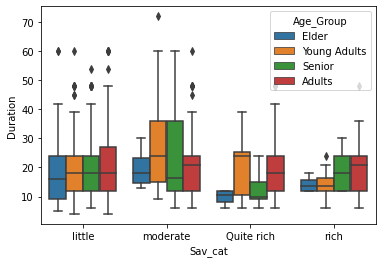

In [ ]:
# A plot to see Saving accounts vs Duration wrt to their age group

# data.groupby("Saving accounts").mean()[["Age", "Duration"]].T.plot(kind="box")

sns.boxplot(data=German_data, x="Sav_cat", y="Duration", hue="Age_Group")

<AxesSubplot:xlabel='Check_cat', ylabel='Credit_amount'>

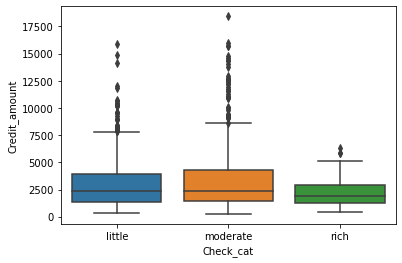

In [ ]:
# A plot to see checking account vs Credit amount

# data.groupby("Checking account").mean()["Credit amount"].T.plot(kind="bar")

sns.boxplot(data=German_data, x="Check_cat", y="Credit_amount")

<AxesSubplot:xlabel='Check_cat', ylabel='Duration'>

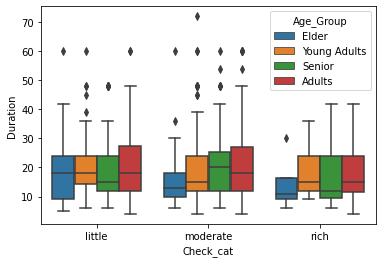

In [ ]:
# A plot to see checking account vs Duration wrt to their age group

# data.groupby("Checking account").mean()[["Age", "Duration"]].T.plot(kind="bar")

sns.boxplot(data=German_data, x="Check_cat", y="Duration", hue="Age_Group")

* We can see that the middle class took higher amount of credit and at a higher frequency for longer periods.

### Summary:

* We see that highly skilled and skilled workers took longer duration credit from banks. In age we don't see much of a difference as all job classes were between 30-40.

* From the previous plot and this plot we understand that the banks gave higher credit amount for more duration to highly skilled workers. But skilled workers who applied for more no. of applications got lower credit amount.

* People with free housing applied for larger amount of credit. This is clear that someone who can't afford his own house must take credit from the bank to survive.


#### Q4.How many highly skilled men (below 35 years) are staying in their own house?

In [ ]:
pd.value_counts(German_data['Sex'] == 'male')   # To get total no. of male and female candidates applied forloans

True     690
False    310
Name: Sex, dtype: int64

In [ ]:
hsmb35o = pd.value_counts(( German_data['Sex'] == 'male') & (German_data['Housing'] == 'own') & (German_data["Age"] < 35) & (German_data['Job'] == 'Highly Skilled'))
hsmb35o   # To get highly skilled men below 35 years, who are staying in their own houses

False    972
True      28
dtype: int64

<AxesSubplot:title={'center':'hsmb35o count'}>

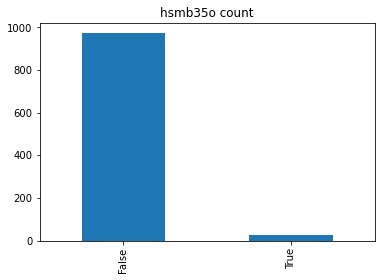

In [ ]:
hsmb35o.plot(kind = "bar", title= "hsmb35o count")

#### Ans: There are 28 highly skilled men (below 35 years) are staying in their own house.

### Q5. Visualize men and females separately for their social status.


<AxesSubplot:ylabel='Sex,Housing'>

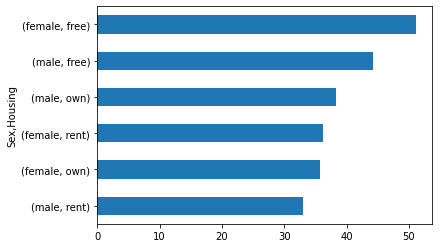

In [ ]:
German_data.groupby(["Job","Sex","Housing"], sort=True).mean().loc["Highly Skilled"]["Age"].T.sort_values().plot(kind="barh")

* We can see from the above graphthat, men and female separarately for their social status like having own, free and rented house.

* From the above graph we can see men and women separetely with respect to their job skills (Social status)

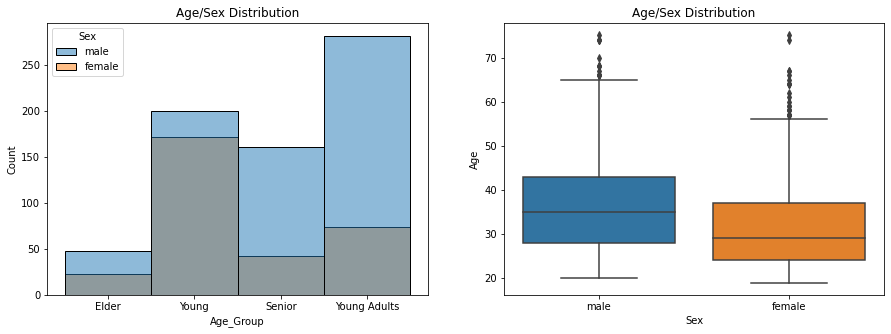

In [ ]:
#  plot to see Age/Sex Distribution

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data, x='Age_Group', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=data, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

* From the above graph we can see different age groups gender wise.

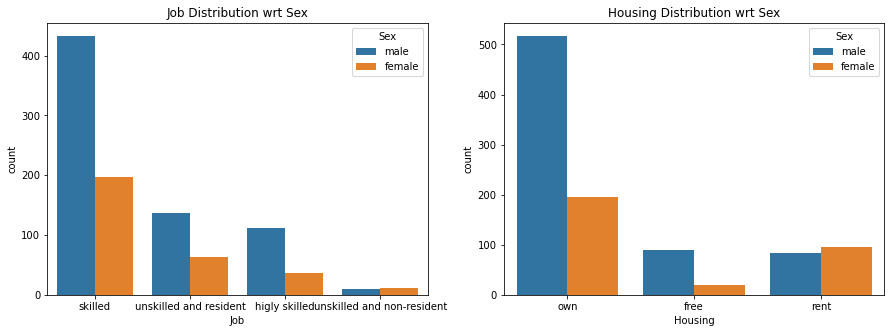

In [ ]:
# A plot to get the total count of each Job gender wise and another plot to get the count of Each housing gender wise.

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=data, x="Job", hue="Sex", ax=ax[0]).set_title("Job Distribution wrt Sex");
sns.countplot(data=data, x="Housing", hue="Sex", ax=ax[1]).set_title("Housing Distribution wrt Sex");

* highly skilled men are around 120 and Men staying in their own houses are 510

### Observations:

1. From the above graphs we can say that more no. of skilled and highly skilled male candidates took loan compared to skilled and highly skilled female candidates.
2. More no. of male candidates who lived in their own houses applied for loan compared to female candidates who lived in their own houses.
3. Female candidates who lived in rent houses applied for loan compared to male candidates, who are living in rent houses.

4. The biggest applications for credit were for car. People who didn't have house where applying to get cars.

5. The poor spent more on business, car and repairs, which are necessities

6. The middle class spent the most on education.

7. The rich and the quite rich took credit for luxury items like car, furniture and TV

8. Females took credit for non essential items and vacations than males.

## Insights

* People didn't prefer to take big credits for longer periods of time.
* We can see that highly skilled workers took greater credit amount than others even though they applied for less no. of applications.
* The biggest applications for credit were for car. People who didn't have house w applying to get cars.

### * Note:

It's always the best practise to include

1. A Suitable title

2. A proper Introduction with all the Information you have

3. Comments to understand each block of code

4. Perfect as well as suitable visualisation methods

5. Detail explanation of the observations and Insights that are helpful for Business development

################################################ Thank you ##################################################################